## Lab Predictions Logistic Regression

In [1]:
# prep: import modules and get pwd
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import getpass  # To get the password without showing the input

In [2]:
# password tool
password = getpass.getpass()

 ········


In [3]:
# mysl connnection setup
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)
query = '''select * from film limit 5;'''

### steps 1-2-3

In [ ]:
# 1. Create a query or queries to extract the information you think may be relevant 
# for building the prediction model. It should include some film features and some rental features (X). 

In [ ]:
# 2. Create a query to get the list of all unique film titles and a boolean indicating 
# if it was rented (rental_date) in May 2005. (Create new column called - 'rented_in_may'). 
# This will be our **TARGET** (y) variable.


In [ ]:
# 3. Read the data into a Pandas dataframe.  At this point you should have 1000 rows.  
# Number of columns depends on the number of features you chose.

In [5]:
# query selects information from tables film, film_category, and category,
# as well as from custom made VIEW 'rental_info_2'. Please view the queries folder for 
# full view on the queries and aggregations executed before to obtain the data.
query = '''
SELECT
    f.film_id,
    r.rented_may,
    r.film_copies,
    r.times_rented_may,
    r.top_actor_flag,
    f.title,
    f.release_year,
    f.language_id,
    f.length,
    f.rental_rate,
    f.rating,
    c.name as category,
	rc2.rental_count_2005_06
FROM 
	rental_info_2 r
LEFT JOIN film f on r.film_id = f.film_id
LEFT JOIN film_category fc ON f.film_id = fc.film_id
LEFT JOIN category c ON fc.category_id = c.category_id
LEFT jOIN rental_count_2005_06 rc2 ON f.film_id = rc2.film_id
ORDER BY
	f.film_id ASC
;
'''

In [6]:
data = pd.read_sql_query(query, engine)
data

,film_id,rented_may,film_copies,times_rented_may,top_actor_flag,title,release_year,language_id,length,rental_rate,rating,category,rental_count_2005_06
0,1,1.0,8,2.0,1,ACADEMY DINOSAUR,2006,1,86,0.99,PG,Documentary,3.0
1,2,NaN,3,NaN,0,ACE GOLDFINGER,2006,1,48,4.99,G,Horror,NaN
2,3,1.0,4,1.0,0,ADAPTATION HOLES,2006,1,50,2.99,NC-17,Documentary,1.0
3,4,1.0,7,2.0,0,AFFAIR PREJUDICE,2006,1,117,2.99,G,Horror,2.0
4,5,1.0,3,1.0,0,AFRICAN EGG,2006,1,130,2.99,G,Family,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,NaN,2,NaN,0,YOUNG LANGUAGE,2006,1,183,0.99,G,Documentary,1.0
996,997,NaN,2,NaN,1,YOUTH KICK,2006,1,179,0.99,NC-17,Music,1.0
997,998,1.0,2,1.0,0,ZHIVAGO CORE,2006,1,105,0.99,NC-17,Horror,2.0
998,999,1.0,5,1.0,0,ZOOLANDER FICTION,2006,1,101,2.99,R,Children,2.0


In [7]:
#data copy 
data_original=data.copy()

#### Initial Data Exploration and cleaning

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   film_id               1000 non-null   int64  
 1   rented_may            1000 non-null   int64  
 2   film_copies           1000 non-null   int64  
 3   times_rented_may      1000 non-null   int64  
 4   top_actor_flag        1000 non-null   int64  
 5   title                 1000 non-null   object 
 6   release_year          1000 non-null   int64  
 7   language_id           1000 non-null   int64  
 8   length                1000 non-null   int64  
 9   rental_rate           1000 non-null   float64
 10  rating                1000 non-null   object 
 11  category              1000 non-null   object 
 12  rental_count_2005_06  1000 non-null   int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 101.7+ KB


In [ ]:
data.dtypes

In [ ]:
data.isna().sum()

In [11]:
#data type check and null cleaning

data['length'] = data['length'].astype('int')
data['language_id'] = data['language_id'].astype('int')
data['release_year'] = data['release_year'].astype('int')

# removing nulls from the 3 columns with Nulls
data['rented_may'] = data['rented_may'].fillna(0).astype(int)
data['times_rented_may'] = data['times_rented_may'].fillna(0).astype(int)
data['rental_count_2005_06'] = data['rental_count_2005_06'].fillna(0).astype(int)


In [ ]:
data['times_rented_may'].unique()

In [ ]:
data['times_rented_may'].value_counts()

In [ ]:
data.shape

In [20]:
data

,rented_may,film_copies,times_rented_may,top_actor_flag,title,release_year,language_id,length,rental_rate,rating,category,rental_count_2005_06
film_id,,,,,,,,,,,,
1,1,8,2,1,ACADEMY DINOSAUR,2006,1,86,0.99,PG,Documentary,3
2,0,3,0,0,ACE GOLDFINGER,2006,1,48,4.99,G,Horror,0
3,1,4,1,0,ADAPTATION HOLES,2006,1,50,2.99,NC-17,Documentary,1
4,1,7,2,0,AFFAIR PREJUDICE,2006,1,117,2.99,G,Horror,2
5,1,3,1,0,AFRICAN EGG,2006,1,130,2.99,G,Family,2
...,...,...,...,...,...,...,...,...,...,...,...,...
996,0,2,0,0,YOUNG LANGUAGE,2006,1,183,0.99,G,Documentary,1
997,0,2,0,1,YOUTH KICK,2006,1,179,0.99,NC-17,Music,1
998,1,2,1,0,ZHIVAGO CORE,2006,1,105,0.99,NC-17,Horror,2


In [19]:
data.set_index('film_id', inplace=True)


### step 4

In [ ]:
# 4. Analyze extracted features (X) and transform them. You may need to encode some categorical variables, 
# or scale numerical variables.


#### Data Exploration: selected variables

In [13]:
# Describe object columns in original data
data.describe(include='object') # decide to drop release year, language id

,title,rating,category
count,1000,1000,1000
unique,1000,5,16
top,ACADEMY DINOSAUR,PG-13,Sports
freq,1,223,74


In [21]:
selected_data=data.copy()

In [22]:
# decide to drop columns due to redundancy (only one unique value): (1) release year, (2) language id
selected_data=data.drop(['release_year','language_id'], axis=1, inplace=False)

# decide to drop (3) category (too many unique values, does not seem to be very related to the dependent variable)
# and (4) title: used mostly as an identifier, for which film_id was kept

#data['category'].value_counts()
selected_data=selected_data.drop('category', axis=1, inplace=False)
selected_data=selected_data.drop('title', axis=1, inplace=False)

# dropped becuase it is directly related to y (always 0 when y is 0). 
selected_data=selected_data.drop('times_rented_may', axis=1, inplace=False)

In [23]:
# Describe object columns in selected data, after removing multiple columns
selected_data.describe(include='object') #drop release year, language id

,rating
count,1000
unique,5
top,PG-13
freq,223


In [24]:
#Describe selected numerical data
selected_data.describe()

,rented_may,film_copies,top_actor_flag,length,rental_rate,rental_count_2005_06
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.686000,4.581000,0.119000,115.272000,2.980000,2.311000
std,0.464349,2.020277,0.323951,40.426332,1.646393,1.439566
min,0.000000,0.000000,0.000000,46.000000,0.990000,0.000000
25%,0.000000,3.000000,0.000000,80.000000,0.990000,1.000000
50%,1.000000,5.000000,0.000000,114.000000,2.990000,2.000000
75%,1.000000,6.000000,0.000000,149.250000,4.990000,3.000000
max,1.000000,8.000000,1.000000,185.000000,4.990000,7.000000


In [ ]:
# Analyis of variables: length
sns.histplot(data=data, x='length')

In [ ]:
# Analyis of variables: length

skewness_length = data['length'].skew()
skewness_length

In [ ]:
# the analysis of 'length' leads to not suggesting any transformation for this variable
# as the data shows a very low skewness factor and the visually it seems to have a relatively even distribution 

In [ ]:
# other variables' analysis
pd.crosstab(data['rented_may'],data['film_copies'])

In [ ]:
# other variables' analysis

pd.crosstab(data['times_rented_may'],data['film_copies'])

#### Charts & Plots

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='rented_may', y='film_copies', data=data)
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='film_copies', y='times_rented_may', data=data)
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='rental_rate', y='times_rented_may', data=data)
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='rating', y='times_rented_may', data=data)
plt.show()

In [ ]:

sorted_data = data.sort_values('times_rented_may', ascending=False)

sns.barplot(y='category', x='times_rented_may', data=sorted_data, order=sorted_data['category'].unique())
plt.show()

#### encode some categorical variables, or scale numerical variables.

In [ ]:
# data.info
selected_data.info()

 #   Column            type.           Dtype  
---  ------            --------------  -----  
 0   film_id           index.          object  -- 
 1   rented_may        1/0 categorical ord   object  -- encoded
 2   film_copies       num; discrete1:6   int64  -- encoded
 3   times_rented_may  0-5 num;discrete   int64  --encoded
 4   top_actor_flag    1/0 categorical ord   object  -- encoded
 5   title                             object  x (drop) 
 6   length            num, cont.       int64  
 7   rental_rate       3 options   float64 --  to encode!
 8   rating            1000 non-null   object  use onehotencoder
 9   category          1000 non-null   object drop. too many examples
     rental_count_2005_06: int: ideally would use the rental count fothe month before but it was not available in the data. -->

In [25]:
#visualize data
selected_data

,rented_may,film_copies,top_actor_flag,length,rental_rate,rating,rental_count_2005_06
film_id,,,,,,,
1,1,8,1,86,0.99,PG,3
2,0,3,0,48,4.99,G,0
3,1,4,0,50,2.99,NC-17,1
4,1,7,0,117,2.99,G,2
5,1,3,0,130,2.99,G,2
...,...,...,...,...,...,...,...
996,0,2,0,183,0.99,G,1
997,0,2,1,179,0.99,NC-17,1
998,1,2,0,105,0.99,NC-17,2


In [ ]:
# TBD if NEEDED?

# reset index to aid the splitting and concatenating of data

#selected_data.reset_index(drop=True, inplace=True)

#selected_data.set_index("film_id", inplace=True)

### Data Splitting: X-y split and train-test-split before transformations

In [26]:
# X-y split and train-test-split before transformations
# then train transformation on training set only

y = selected_data['rented_may']
X = selected_data.drop('rented_may', axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=70)

In [27]:
print(y.shape)
print(X.shape)

(1000,)
(1000, 6)


In [28]:
# (6) Create new Pandas DataFrames from the X_train and X_test Numpy arrays:

X_train_df = pd.DataFrame(X_train, columns = X.columns)
X_test_df  = pd.DataFrame(X_test,  columns = X.columns)

In [29]:
print(X_train_df.shape)
print(X_test_df.shape)

(750, 6)
(250, 6)


In [ ]:
X_train_df['rating'].value_counts()

In [30]:
# (7) Split the X_train Pandas DataFrame into two parts: numerical and categorical

#numerical TRAIN:
X_train_num_df = X_train_df.select_dtypes(include = np.number)

#numerical TEST:
X_test_num_df = X_test_df.select_dtypes(include = np.number)

#categorical:
X_train_cat_df=X_train_df.select_dtypes(include=["object"])
X_test_cat_df=X_test_df.select_dtypes(include=["object"])

In [31]:
print(X_train_num_df.shape)
print(X_test_num_df.shape)

print(X_train_cat_df.shape)
print(X_test_cat_df.shape)

(750, 5)
(250, 5)
(750, 1)
(250, 1)


In [35]:
X_test_cat_df

,rating
film_id,
621,PG-13
665,PG
382,PG
644,PG
222,R
...,...
994,PG-13
967,R
107,G


### Data Transformation

#### transform numerical col

In [ ]:
# decided not to apply any transformation to 'length' as the data shows very slow skewness (0.03)

Numerical columns based on dtype.
col name type: comment

film_id: index: from database

film_copies: int: discrete: number of times the film_id shows up in inventory (used as equivalent of number of film copies)

rental_count_2005_06: discrete: number of times film was rented in June 2005.


length: int: from database, length of film

Categorical columns shown as numerical because of the data type:
top_actor_flag: int: binary coded column, showing if one of the top 3 prolific actors star in the film. Used as a categorical nominal data type.
rental_rate: float: from database, rental rate (price). Will be transformed to 0,1,2 through a mapping, converting it into a categorical ordinal data type.

In [36]:
#rental rate transformation mapping

rental_rate_map={0.99: 1, 2.99: 2, 4.99: 3}

X_train_num_df['rental_rate'] = X_train_num_df['rental_rate'].replace(rental_rate_map, inplace=False)
X_test_num_df['rental_rate']= X_test_num_df['rental_rate'].replace(rental_rate_map, inplace=False)

X_train_num_df['rental_rate'] = X_train_num_df['rental_rate'].astype('int')
X_test_num_df['rental_rate'] = X_test_num_df['rental_rate'].astype('int')


#### transform categorical col

Categorical Column:

rating: categorical: nominal (it has been chosen not to give these categories an order
as they reflect potentially different audiences but it has not been possible to clearly define a business related order thereof)


In [37]:
# Train the OneHotEncoder only on the train set using the .fit() method.
from sklearn.preprocessing import OneHotEncoder
import pickle

encoder = OneHotEncoder(drop='first', handle_unknown='ignore')  
encoder.fit(X_train_cat_df)

OneHotEncoder(drop='first', handle_unknown='ignore')

In [38]:
# save encoder for future use

path = "./"
filename = "one_hot_encoder_film_rating.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(encoder, file)

In [39]:
# # Apply the OneHotEncoder on both the train and test sets using the .transform() method.

X_train_cat_npa_encoded = encoder.transform(X_train_cat_df).toarray() #apply to train
X_test_cat_npa_encoded = encoder.transform(X_test_cat_df).toarray() #apply to test

In [40]:
# convert np.arrays to pd.DataFrame
X_train_cat_df_encoded = pd.DataFrame(X_train_cat_npa_encoded, columns=encoder.get_feature_names_out())
X_test_cat_df_encoded = pd.DataFrame(X_test_cat_npa_encoded, columns=encoder.get_feature_names_out())

In [41]:
print(X_train_cat_df_encoded.shape)
print(X_test_cat_df_encoded.shape)

(750, 4)
(250, 4)


In [42]:
print(X_train_num_df.shape)
print(X_train_cat_df_encoded.shape)

(750, 5)
(750, 4)


In [46]:
X_train_cat_df_encoded.reset_index(inplace=True)


In [50]:
#X_train_num_df
#X_train_cat_df_encoded
#X

,film_id,film_copies,top_actor_flag,length,rental_rate,rental_count_2005_06
0,800,6,0,126,2,3
1,445,6,1,100,2,5
2,547,2,0,117,1,1
3,937,5,0,85,2,3
4,422,2,0,136,3,2
...,...,...,...,...,...,...
745,317,7,0,148,1,2
746,793,4,0,139,2,1
747,115,7,0,167,2,2
748,215,6,0,57,3,1


#### concatenate dataframes

In [48]:
X_train_num_df.reset_index(inplace=True)
X_train_cat_df_encoded.reset_index(inplace=True)
X_test_num_df.reset_index(inplace=True)
X_test_cat_df_encoded.reset_index(inplace=True)


In [51]:
# (13) Concatenate the transformed numerical and categorical DataFrames:
#num, cat ord, cat nom, client
#X_train_num_df
#X_test_num_df


# concat
X_train_concat_df = pd.concat([X_train_num_df,X_train_cat_df_encoded], axis=1)
X_test_concat_df = pd.concat([X_test_num_df,X_test_cat_df_encoded], axis=1)

In [59]:
X_test_concat_df

,film_copies,top_actor_flag,length,rental_rate,rental_count_2005_06,index,rating_NC-17,rating_PG,rating_PG-13,rating_R
film_id,,,,,,,,,,
621,8,0,75,2,5,0,0.0,0.0,1.0,0.0
665,7,0,175,2,3,1,0.0,1.0,0.0,0.0
382,8,0,137,1,6,2,0.0,1.0,0.0,0.0
644,7,0,115,2,4,3,0.0,1.0,0.0,0.0
222,6,0,64,3,2,4,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
994,3,0,100,3,2,245,0.0,0.0,1.0,0.0
967,5,0,134,2,3,246,0.0,0.0,0.0,1.0
107,2,0,63,2,0,247,0.0,0.0,0.0,0.0


In [57]:
X_train_concat_df.reset_index(drop=True, inplace=True)
X_test_concat_df.reset_index(drop=True, inplace=True)

X_train_concat_df.set_index("film_id", inplace=True)
X_test_concat_df.set_index("film_id", inplace=True)

In [ ]:
X_test_concat_df

### SCALE?

In [60]:
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler
#X_train_concat_df 
#X_test_concat_df


X_train_minmax_cols = X_train_concat_df[['length','film_copies']]
X_test_minmax_cols = X_test_concat_df[['length','film_copies']]

# Scaling data
transformer = MinMaxScaler().fit(X_train_minmax_cols) # need to keep transformer

X_train_normalized = transformer.transform(X_train_minmax_cols)
X_test_normalized  = transformer.transform(X_test_minmax_cols)

X_train_norm = pd.DataFrame(X_train_normalized, columns=X_train_minmax_cols.columns, index= X_train_minmax_cols.index)
X_test_norm  = pd.DataFrame(X_test_normalized, columns=X_test_minmax_cols.columns, index= X_test_minmax_cols.index)

In [61]:
path = "./"
filename = "MinMaxScaler.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(transformer, file)

In [62]:
X_train_concat_df[['length','film_copies']]=X_train_norm

In [63]:
X_test_concat_df[['length','film_copies']]=X_test_norm

### 5. Create a logistic regression model to predict 'rented_in_may' from the cleaned data.

In [67]:
# Solve issue unglamorously: drop index columns that should not be present.
# To be corrected in previous code!

X_train_concat_df.drop('level_0', axis=1, inplace=True)
X_train_concat_df.drop('index', axis=1, inplace=True)
X_test_concat_df.drop('index', axis=1, inplace=True)


In [68]:
from sklearn.linear_model import LogisticRegression

classification = LogisticRegression(max_iter=1000, random_state=0, solver='lbfgs',
                  multi_class='multinomial')

classification.fit(X_train_concat_df, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=0)

In [69]:
path = "./"
filename = "classification_logistic_regression.pkl"
with open(path+filename, "wb") as file:
    pickle.dump(classification, file)

In [65]:
#X_train_concat_df

In [70]:
#X_test_concat_df

In [71]:
# Make predictions on the test set: 
# Use the trained model to predict the target variable values for the transformed test data:

y_test_pred = classification.predict(X_test_concat_df)

In [72]:
print(y_test_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0
 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0
 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1
 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1]


In [73]:
# Comparing y_train to y_test_pred below: shows the test has amplified the result '0'
pd.Series(y_train).value_counts()


rented_may
1    513
0    237
Name: count, dtype: int64

In [74]:
pd.Series(y_test_pred).value_counts()


1    188
0     62
Name: count, dtype: int64

In [ ]:
# 6. Evaluate the results.

In [75]:
#Evaluate the model's performance: Now that you have the predicted values (y_test_pred) for the test set,
# you can compare them with the actual target variable values (y_test) to evaluate the model's performance
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_test_pred)) # or classification.score(X_test_concat_df, y_test)



0.796


In [ ]:
#For classification models, other evaluation metrics like accuracy, precision, recall, 
# and F1 score are commonly used to assess model performance, while R-squared is more appropriate 
# for regression models.

In [76]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix(y_test, y_test_pred)

array([[ 44,  33],
       [ 18, 155]])

In [78]:
import matplotlib.pyplot as plt


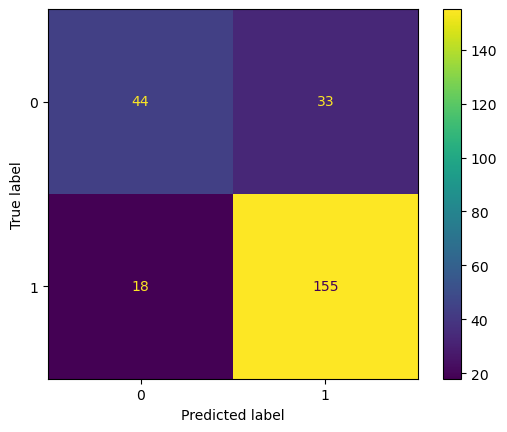

In [79]:
cm_test = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(cm_test,display_labels=classification.classes_)
disp.plot()
plt.show()

In [80]:
from sklearn.metrics import cohen_kappa_score

In [81]:
cohen_kappa_score(y_test, y_test_pred)

0.4940877708118404

In [82]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.71      0.57      0.63        77
           1       0.82      0.90      0.86       173

    accuracy                           0.80       250
   macro avg       0.77      0.73      0.75       250
weighted avg       0.79      0.80      0.79       250



## Test Interpretations: analyzing first test run:


First test run:

list of columns:
['film_id', 'film_copies', 'top_actor_flag', 'length', 'rental_rate',
       Rating columns: 'rating_NC-17', 'rating_PG', 'rating_PG-13', 'rating_R']

Variable transformation:

numerical: no transformation

Categorical:

Rating: onehotencoder
rental_rate: converted to integrers 0,1,2 based on the rental rate (price

Scaling: no scaling applied

RESULTS:
accuracy: 0.732

kappa: 0.2496192097482305

              precision    recall  f1-score   support

           0       0.66      0.27      0.39        77
           1       0.74      0.94      0.83       173

    accuracy                           0.73       250
   macro avg       0.70      0.60      0.61       250
weighted avg       0.72      0.73      0.69       250


Second test run: (changes vs previous test run marked as: *CHANGE)

No material change in results!

list of columns:
['film_id', 'film_copies', 'top_actor_flag', 'length', 'rental_rate',
       Rating columns: 'rating_NC-17', 'rating_PG', 'rating_PG-13', 'rating_R']

Variable transformation:

numerical: no transformation

Categorical:

Rating: onehotencoder
rental_rate: converted to integrers 0,1,2 based on the rental rate (price

Scaling:  *CHANGE: minmax scaler to be applied to length and film copies.

Third test run:

list of columns:  *CHANGE: rental count previous month to be added.
['film_id', 'film_copies', 'top_actor_flag', 'length', 'rental_rate',
       Rating columns: 'rating_NC-17', 'rating_PG', 'rating_PG-13', 'rating_R']

Variable transformation:

numerical: no transformation

Categorical:

Rating: onehotencoder
rental_rate: converted to integrers 0,1,2 based on the rental rate (price

Scaling:  *CHANGE: minmax scaler to be applied to length and film copies.

RESULTS

accuracy: 0.796

kappa: 0.4940877708118404 (increase from 0.2496192097482305)
              precision    recall  f1-score   support

           0       0.71      0.57      0.63        77
           1       0.82      0.90      0.86       173

    accuracy                           0.80       250
   macro avg       0.77      0.73      0.75       250
weighted avg       0.79      0.80      0.79       250



